In [1]:
import numpy as np
import sympy as sp
import torch as pt
from tqdm import tqdm
import scipy 

import matplotlib.pyplot as plt

np.random.seed(0)
pt.manual_seed(0)

font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Exercise 2
## ISOKANN
ISOKANN is an algorithm that uses machine learning techniques to identify invariant subspaces of the Koopman operator.
In this exercise, we will learn how it works when applied to a one-dimensional system.

#### System parameters

In [2]:
kB     = 0.008314463                 # kJ mol-1 K
T      = 300                         # K   
mass   = 1                           # amu
gamma  = 1                           # ps-1 
sigma  = np.sqrt(2 * kB * T / mass / gamma )              # nm ps-1/2
beta   = 1 / kB / T                  # kJ-1 mol 

print("Thermal energy:", kB * T)

Thermal energy: 2.4943389


#### Potential energy function

Text(0.5, 0, 'x')

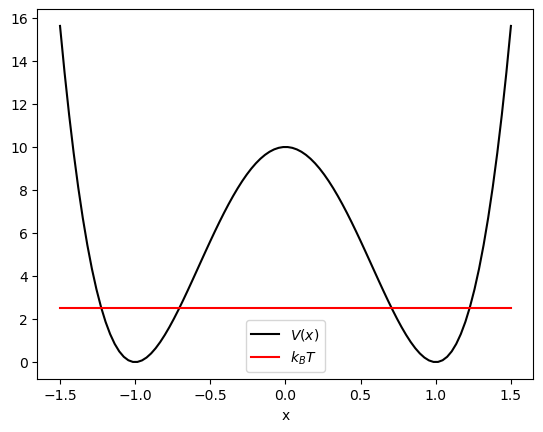

In [3]:
Eb     =  10
x      =  sp.symbols('x')
V      =  Eb*(x**2 - 1)**2

#a = 0.3
#V      =  - 1 / beta * sp.log( sp.exp( - ( x - 1 ) ** 2 / a ) + sp.exp( - ( x + 1 ) ** 2 / a ) )

gradV  =  V.diff(x)

V      =  sp.lambdify((x), V, modules=['numpy'])
gradV  =  sp.lambdify((x), gradV, modules=['numpy'])

x      =  np.linspace(-1.5, 1.5,100)
plt.plot(x, V(x), 'k-', label = r'$V(x)$')
plt.plot(x, kB*T*np.ones(100),'r', label = r'$k_B T$')
plt.legend()
plt.xlabel('x')

Load the data set of initial points $x_0$.
Load the data set of final points $x_t$.

In [ ]:
# Load initial points
x0 = np.loadtxt('x0.txt')
plt.plot(x0)

Npoints = len(x0)
print(Npoints)

# Load final points
xt = np.loadtxt('xt.txt')
print(xt.shape)

Npoints = xt.shape[0]  # == len(x0)
Nreps   = xt.shape[1]

# Length of each trajectory (this information isu used later for rate estimation)
Nsteps = 200
# Integrator time step used for simulations
dt     = 0.001

In the next cell define the NN and the training function that you implemented in exercise 1.

In the next cell implement the scale and shift function:

$$
\hat{y} = \frac{y - \min(y)}{\max(y) - \min(y)}
$$

In [5]:
def scale_and_shift(y):


    return hat_y

Implement the ISOKANN algorithm:
\begin{eqnarray*}
    \hat{f}_{k+1} &=& \frac{\mathcal{S}\mathcal{K}(\tau) f_k}{\lVert \mathcal{S}\mathcal{K}(\tau) f_k \rVert} \cr 
    \lim_{k\rightarrow \infty } \hat{f}_{k+1} &=& \chi_i(x) \quad i=1,2
\end{eqnarray*}

For a two-state system, $\mathcal{S}$ is given by

\begin{eqnarray*}
    \mathcal{S}\mathcal{K}(\tau) f_k = \frac{\mathcal{K}(\tau) f_k - \min\left(\mathcal{K}(\tau) f_k\right)}{\max\left(\mathcal{K}(\tau) f_k\right) - \min\left(\mathcal{K}(\tau) f_k\right)}
\end{eqnarray*}

The action of the Koopman operator on a function is approximated as

\begin{eqnarray}
   \mathcal{K}(\tau)f(x) &=& \mathbb{E}\left[ f(x_{\tau})\vert x_0 = x\right] \cr
    &\approx& \frac{1}{N} \sum_{n=1}^N f(x_{\tau,n}) = \bar{f}(x_{\tau}) \, ,
\end{eqnarray}

where $x_{\tau,n}$ is the end-point of the $n$th simulation of length $\tau$ starting in $x_0 = x$.

In [16]:
# Convert the datasets x0 and xt to torch


# Define the NN

# Number of iterations
Niters = 5

for i in tqdm(range(Niters)):
             


chi   = f_NN(pt_x0).detach().numpy()

<bound method Module.modules of NeuralNetwork3(
  (layer1): Linear(in_features=1, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=1, bias=True)
  (activation1): Sigmoid()
  (activation2): ReLU()
  (activation3): Softplus(beta=10, threshold=20)
)>


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.99s/it]


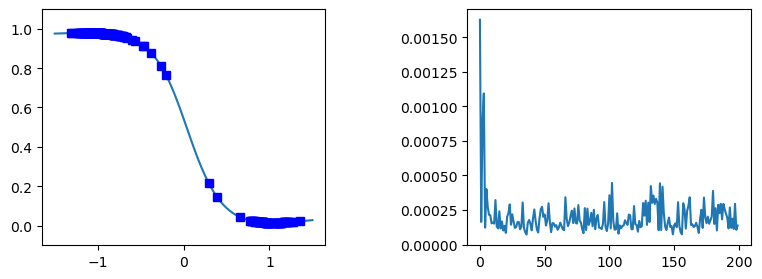

In [21]:
pt_x = pt.tensor(x, dtype=pt.float32).unsqueeze(1)
pt_y
fig = plt.figure(figsize=(18*in2cm, 6*in2cm))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y, 'k')
ax.plot(x0, chi,   'sb')
ax.set_ylim(-0.1,1.1);

ax = fig.add_subplot(1, 2, 2)
ax.plot(loss1)


plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.5)
#fig.savefig('par5_1.png', format='png', dpi=900, bbox_inches='tight')

The Koopman operator acts on $\chi(x)$ as

\begin{eqnarray*}
\chi(x,t+\tau) &=& \mathcal{K}(\tau) \chi(x,t) \cr
&=& \gamma_1 \chi(x,t) + \gamma_2\, .
\end{eqnarray*}

From linear regression we can estimate $\gamma_1$ and $\gamma_2$, and exit rates:

\begin{eqnarray*}
\kappa = - \frac{1}{\tau} \log(\gamma_1) \left( 1 + \frac{\gamma_2}{\gamma_1 - 1}\right)
\end{eqnarray*}

In [18]:
def exit_rates_from_chi(Nsteps, dt, chi, prop_chi):



    

    return rate1

In [19]:
# Calculate the propagated chi



rate12_1  = exit_rates_from_chi(Nsteps, dt, chi, chi_t)

Exit rate 1: 0.15356265173970382

